<a href="https://colab.research.google.com/github/meghmodi2810/Machine-Learning-Projects/blob/main/ReinforcementLearning_OpenAI_Gym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This is a sample

In [31]:
import gymnasium as gym   # all you have to do to import and use open ai gym!

In [32]:
env = gym.make('FrozenLake-v1', render_mode="rgb_array")  # we are going to use the FrozenLake enviornment

In [33]:
print(env.observation_space.n)   # get number of states
print(env.action_space.n)   # get number of actions

16
4


In [34]:
env.reset()  # reset enviornment to default state

(0, {'prob': 1})

In [35]:
action = env.action_space.sample()  # get a random action

In [36]:
next_state, reward, terminated, truncated, info = env.step(action)
done = terminated or truncated

array([[[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]],

       [[180, 200, 230],
        [204, 230, 255],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [204, 230, 255],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       ...,

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [235, 245, 249],
        [180, 200, 230]],

       [[180, 200, 230],
        [235, 245, 249],
        [235, 245, 249],
        ...,
        [204, 230, 255],
        [204, 230, 255],
        [180, 200, 230]],

       [[180, 200, 230],
        [180, 200, 230],
        [180, 200, 230],
        ...,
        [180, 200, 230],
        [180, 200, 230],
        [180, 200, 230]]], dtype=uint8)
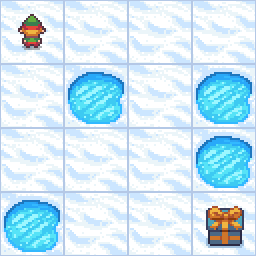

In [37]:
env.render()   # render the GUI for the enviornment

# Complete Reinforcement using OpenAI Gymnasium

In [45]:
import numpy as np
import time

env = gym.make('FrozenLake-v1', render_mode='rgb_array')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = True # if you want to see training set to true

epsilon = 0.9


In [46]:
rewards = []
for episode in range(EPISODES):

  state, _ = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[3.38984690e-01 2.98551054e-02 2.94979742e-02 3.23682348e-02]
 [7.46633976e-03 6.96018829e-03 1.12284393e-02 2.46597053e-01]
 [8.73353547e-03 9.32761280e-03 1.32734429e-02 1.63916235e-01]
 [1.14923132e-02 9.46604923e-03 6.80112852e-03 1.25025610e-01]
 [4.90510459e-01 1.09542960e-03 9.09469747e-03 9.85631406e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.56175810e-04 1.62640289e-04 1.82144381e-01 1.59365499e-07]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.10293362e-03 1.79886741e-02 1.35053573e-04 7.22692845e-01]
 [5.29988755e-03 6.25468122e-01 4.93338864e-03 8.82422845e-03]
 [3.18368314e-01 2.19327421e-03 1.56051933e-03 3.02058116e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.13072493e-02 2.70473317e-02 8.45787116e-01 2.21661396e-02]
 [8.10157143e-02 9.70321145e-01 1.83675400e-01 1.45272165e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

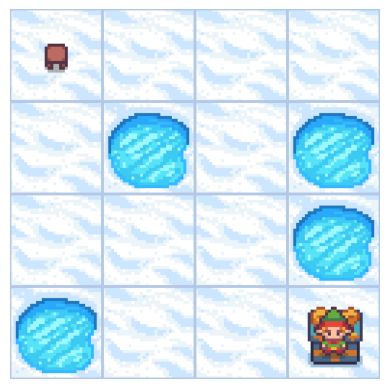

In [47]:
frame = env.render()
plt.imshow(frame)
plt.axis('off')
plt.show()

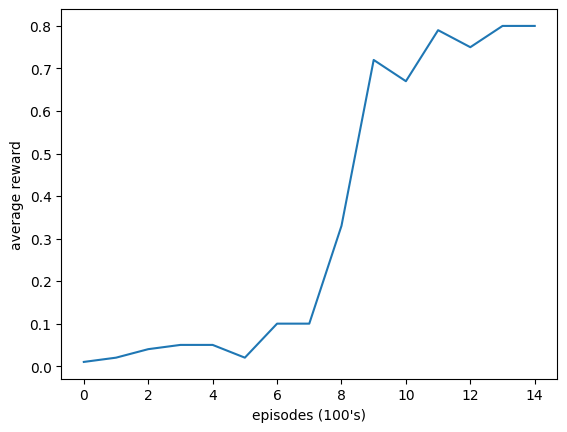

In [48]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()